In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


file_path = r"E:\Projects\Gamezone Orders Data\product_performance.csv"
df = pd.read_csv(
    file_path
)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_name_cleaned  8 non-null      object 
 1   total_revenue         8 non-null      float64
 2   total_orders          8 non-null      int64  
 3   avg_price             8 non-null      float64
 4   total_customers       8 non-null      int64  
 5   repeat_buyers         8 non-null      float64
 6   rpr_%                 8 non-null      float64
 7   revenue_%_of_total    8 non-null      float64
 8   cumulative_revenue_%  8 non-null      float64
 9   revenue_per_order     8 non-null      float64
 10  abc_class             8 non-null      object 
dtypes: float64(7), int64(2), object(2)
memory usage: 836.0+ bytes


In [34]:
df

,product_name_cleaned,total_revenue,total_orders,avg_price,total_customers,repeat_buyers,rpr_%,revenue_%_of_total,cumulative_revenue_%,revenue_per_order,abc_class
0,27in 4k gaming monitor,1968565.34,4723,417.511207,4358,354.0,8.12,32.00,32.00,416.80,A
1,nintendo switch,1658717.65,10386,159.707072,9686,677.0,6.99,26.97,58.97,159.71,A
2,sony playstation 5 bundle,1589243.85,977,1626.656960,900,76.0,8.44,25.84,84.81,1626.66,B
3,lenovo ideapad gaming 3,735506.56,669,1099.411898,617,51.0,8.27,11.96,96.77,1099.41,C
4,jbl quantum 100 gaming headset,96197.67,4296,22.502379,4025,262.0,6.51,1.56,98.33,22.39,C
5,acer nitro v gaming laptop,65661.18,87,754.726207,78,9.0,11.54,1.07,99.40,754.73,C
6,dell gaming mouse,36490.01,719,51.106457,647,71.0,10.97,0.59,99.99,50.75,C
7,razer pro gaming headset,884.23,7,126.318571,7,0.0,0.00,0.01,100.00,126.32,C


In [35]:
print(df.columns.tolist())


['product_name_cleaned', 'total_revenue', 'total_orders', 'avg_price', 'total_customers', 'repeat_buyers', 'rpr_%', 'revenue_%_of_total', 'cumulative_revenue_%', 'revenue_per_order', 'abc_class']


Columns: ['product_name_cleaned', 'total_revenue', 'total_orders', 'avg_price', 'total_customers', 'repeat_buyers', 'rpr_%', 'revenue_%_of_total', 'cumulative_revenue_%', 'revenue_per_order', 'abc_class']
Rows after cleaning: 8


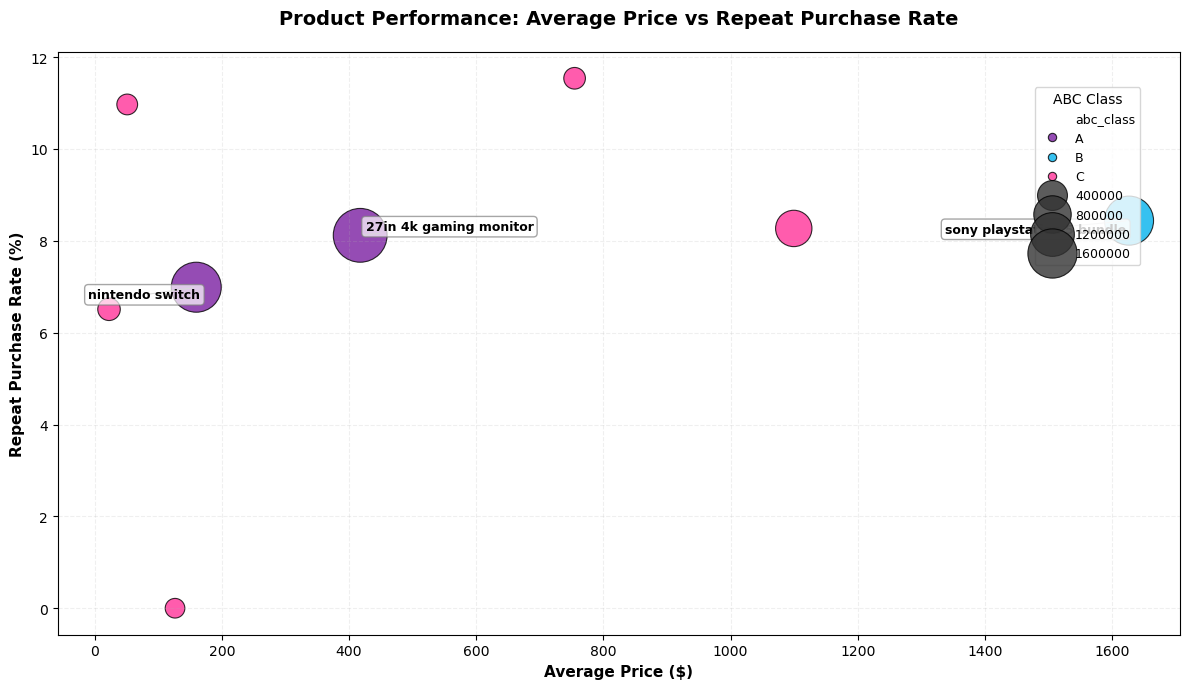

In [36]:
"""
Product Performance Analysis: Bubble Chart Visualization
Creates a scatter plot showing the relationship between price, repeat purchase rate,
and revenue across ABC product classes.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional
from adjustText import adjust_text  # install via: pip install adjustText


def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and standardize dataframe column names.
    
    Args:
        df: Input dataframe
        
    Returns:
        Dataframe with cleaned column names
    """
    df_clean = df.copy()
    df_clean.columns = df_clean.columns.str.strip().str.lower()
    return df_clean


def validate_columns(df: pd.DataFrame, required_cols: List[str]) -> None:
    """
    Validate that required columns exist in the dataframe.
    
    Args:
        df: Input dataframe
        required_cols: List of required column names
        
    Raises:
        ValueError: If any required columns are missing
    """
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")


def create_bubble_chart(
    df: pd.DataFrame,
    x_col: str = 'avg_price',
    y_col: str = 'rpr_%',
    size_col: str = 'total_revenue',
    hue_col: str = 'abc_class',
    label_col: str = 'product_name_cleaned',
    palette: Optional[Dict[str, str]] = None,
    top_n: int = 3,
    figsize: tuple = (12, 7),
    save_path: Optional[str] = None
) -> plt.Figure:
    """
    Create a bubble chart for product performance analysis.
    """
    # Default color palette
    if palette is None:
        palette = {
            'A': '#7B1FA2',  # purple
            'B': '#03b2ed',  # blue
            'C': '#FF3399'   # pink
        }
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Create scatter plot
    scatter = sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        size=size_col,
        hue=hue_col,
        palette=palette,
        sizes=(200, 1500),
        alpha=0.8,
        edgecolor='black',
        linewidth=0.8,
        ax=ax
    )

    # Remove the "total_revenue" legend (auto-created by Seaborn for bubble size)
    handles, labels = ax.get_legend_handles_labels()
    new_handles = []
    new_labels = []
    for h, l in zip(handles, labels):
        if not ("total_revenue" in l.lower() or "size" in l.lower()):
            new_handles.append(h)
            new_labels.append(l)

    # Add custom legend for ABC class inside chart
    legend = ax.legend(
        new_handles,
        new_labels,
        title="ABC Class",
        loc="upper right",
        frameon=True,
        shadow=False,
        fontsize=9,
        title_fontsize=10,
        bbox_to_anchor=(0.97, 0.95)
    )

    # Annotate top N products by revenue
    top_products = df.nlargest(top_n, size_col)
    texts = []
    for _, row in top_products.iterrows():
        texts.append(
            ax.text(
                row[x_col],
                row[y_col],
                row[label_col],
                fontsize=9,
                weight='bold',
                color='black',
                ha='center',
                va='center',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                          edgecolor='gray', alpha=0.7)
            )
        )

    # Adjust labels to prevent overlap
    adjust_text(
        texts,
        only_move={'points': 'y', 'texts': 'y'},
        arrowprops=dict(arrowstyle='-', color='gray', lw=0.7),
        ax=ax
    )

    # Chart styling
    ax.set_title(
        "Product Performance: Average Price vs Repeat Purchase Rate",
        fontsize=14, fontweight='bold', pad=20
    )
    ax.set_xlabel("Average Price ($)", fontsize=11, fontweight='bold')
    ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.2, linestyle='--')
    ax.set_facecolor('white')

    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")

    return fig


def main(df: pd.DataFrame) -> None:
    """
    Main execution function for product performance analysis.
    
    Args:
        df: Input dataframe with product data
    """
    # Clean data
    df_clean = clean_dataframe(df)
    print("Columns:", df_clean.columns.tolist())
    
    # Validate required columns
    required_cols = ['avg_price', 'rpr_%', 'total_revenue', 
                     'abc_class', 'product_name_cleaned']
    validate_columns(df_clean, required_cols)
    
    # Remove any rows with missing values in key columns
    df_clean = df_clean.dropna(subset=required_cols)
    print(f"Rows after cleaning: {len(df_clean)}")
    
    # Create visualization
    fig = create_bubble_chart(
        df_clean,
        top_n=3,
        # save_path='product_performance.png'  # Uncomment to save
    )
    
    plt.show()


# --- Usage Example ---
if __name__ == "__main__":
    # Example:
    # df = pd.read_csv('your_data.csv')
    main(df)


Columns: ['product_name_cleaned', 'total_revenue', 'total_orders', 'avg_price', 'total_customers', 'repeat_buyers', 'rpr_%', 'revenue_%_of_total', 'cumulative_revenue_%', 'revenue_per_order', 'abc_class']
Rows after cleaning: 8


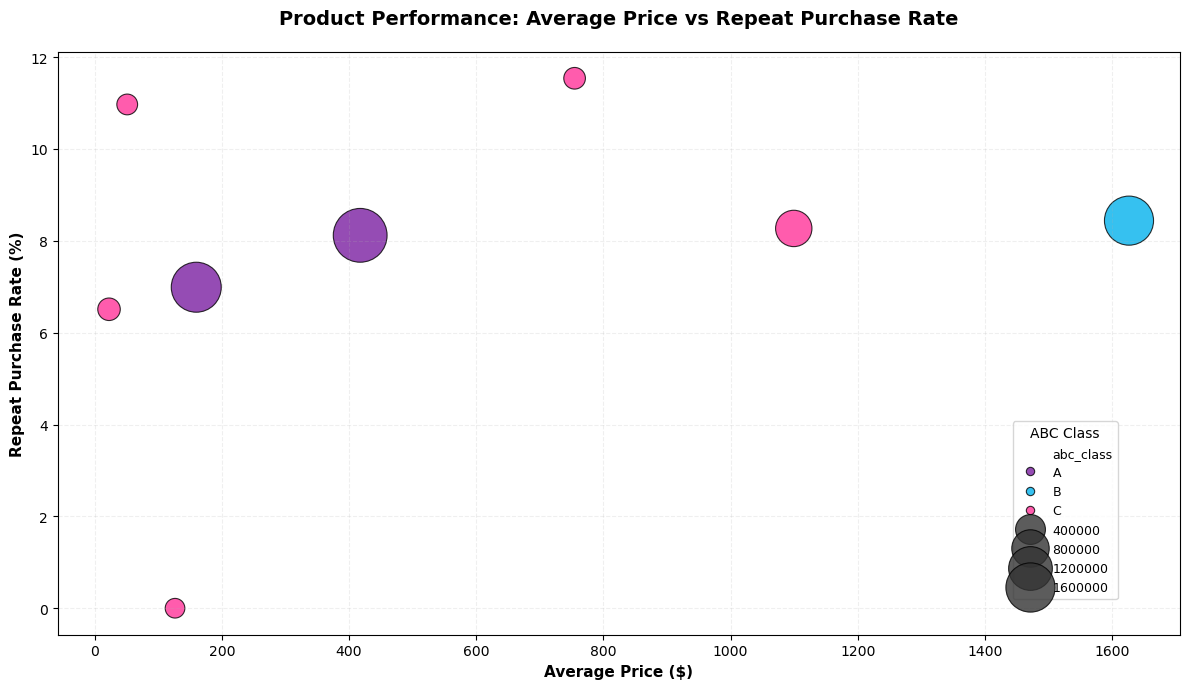

In [37]:
"""
Product Performance Analysis: Bubble Chart Visualization
Creates a scatter plot showing the relationship between price, repeat purchase rate,
and revenue across ABC product classes.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional
from adjustText import adjust_text  # install via: pip install adjustText


def clean_dataframe(df: pd.DataFrame) -> pd.DataFrame:
    """
    Clean and standardize dataframe column names.
    
    Args:
        df: Input dataframe
        
    Returns:
        Dataframe with cleaned column names
    """
    df_clean = df.copy()
    df_clean.columns = df_clean.columns.str.strip().str.lower()
    return df_clean


def validate_columns(df: pd.DataFrame, required_cols: List[str]) -> None:
    """
    Validate that required columns exist in the dataframe.
    
    Args:
        df: Input dataframe
        required_cols: List of required column names
        
    Raises:
        ValueError: If any required columns are missing
    """
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")


def create_bubble_chart(
    df: pd.DataFrame,
    x_col: str = 'avg_price',
    y_col: str = 'rpr_%',
    size_col: str = 'total_revenue',
    hue_col: str = 'abc_class',
    label_col: str = 'product_name_cleaned',
    palette: Optional[Dict[str, str]] = None,
    top_n: int = 3,
    figsize: tuple = (12, 7),
    save_path: Optional[str] = None
) -> plt.Figure:
    """
    Create a bubble chart for product performance analysis.
    """
    # Default color palette
    if palette is None:
        palette = {
            'A': '#7B1FA2',  # purple
            'B': '#03b2ed',  # blue
            'C': '#FF3399'   # pink
        }
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Create scatter plot
    scatter = sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        size=size_col,
        hue=hue_col,
        palette=palette,
        sizes=(200, 1500),
        alpha=0.8,
        edgecolor='black',
        linewidth=0.8,
        ax=ax
    )

    # Remove the "total_revenue" legend (auto-created by Seaborn for bubble size)
    handles, labels = ax.get_legend_handles_labels()
    new_handles = []
    new_labels = []
    for h, l in zip(handles, labels):
        if not ("total_revenue" in l.lower() or "size" in l.lower()):
            new_handles.append(h)
            new_labels.append(l)

    # Add custom legend for ABC class inside bottom right
    legend = ax.legend(
        new_handles,
        new_labels,
        title="ABC Class",
        loc="lower right",
        frameon=True,
        shadow=False,
        fontsize=9,
        title_fontsize=10,
        bbox_to_anchor=(0.95, 0.05)
    )

    # --- Labels REMOVED ---
    # (No annotation or adjust_text block)

    # Chart styling
    ax.set_title(
        "Product Performance: Average Price vs Repeat Purchase Rate",
        fontsize=14, fontweight='bold', pad=20
    )
    ax.set_xlabel("Average Price ($)", fontsize=11, fontweight='bold')
    ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.2, linestyle='--')
    ax.set_facecolor('white')

    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")

    return fig


def main(df: pd.DataFrame) -> None:
    """
    Main execution function for product performance analysis.
    
    Args:
        df: Input dataframe with product data
    """
    # Clean data
    df_clean = clean_dataframe(df)
    print("Columns:", df_clean.columns.tolist())
    
    # Validate required columns
    required_cols = ['avg_price', 'rpr_%', 'total_revenue', 
                     'abc_class', 'product_name_cleaned']
    validate_columns(df_clean, required_cols)
    
    # Remove any rows with missing values in key columns
    df_clean = df_clean.dropna(subset=required_cols)
    print(f"Rows after cleaning: {len(df_clean)}")
    
    # Create visualization
    fig = create_bubble_chart(
        df_clean,
        top_n=3,
        # save_path='product_performance.png'  # Uncomment to save
    )
    
    plt.show()


# --- Usage Example ---
if __name__ == "__main__":
    # Example:
    # df = pd.read_csv('your_data.csv')
    main(df)


Columns: ['product_name_cleaned', 'total_revenue', 'total_orders', 'avg_price', 'total_customers', 'repeat_buyers', 'rpr_%', 'revenue_%_of_total', 'cumulative_revenue_%', 'revenue_per_order', 'abc_class', 'color']
Rows after cleaning: 8


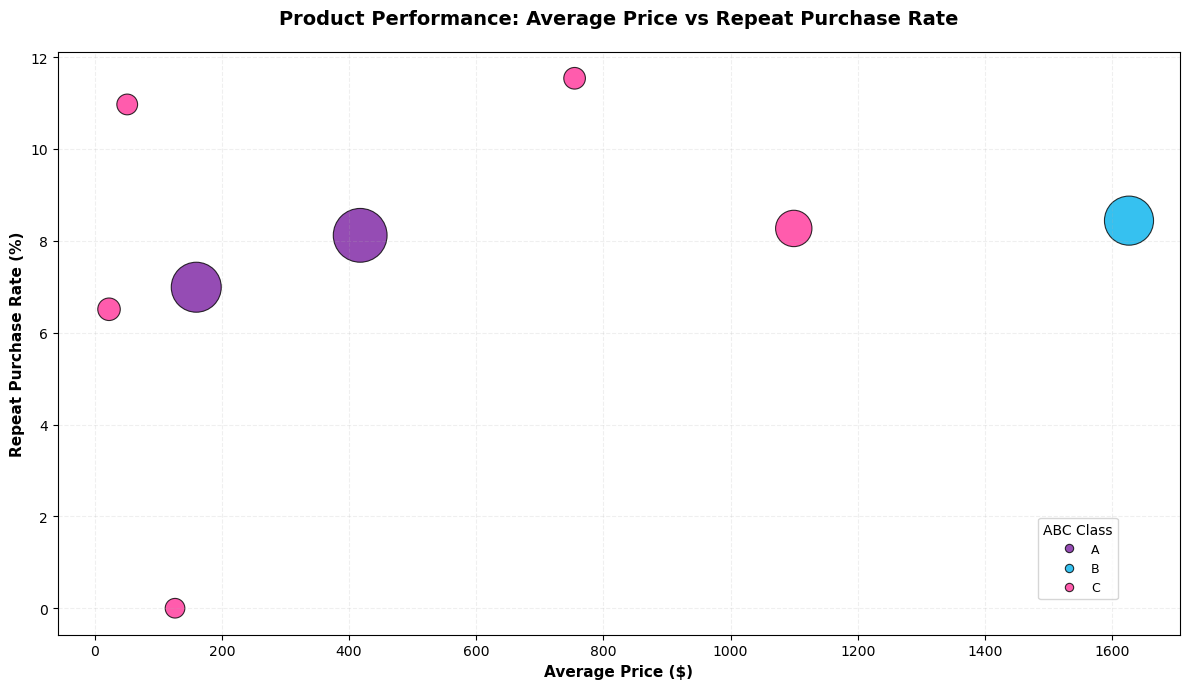

In [47]:
"""
Product Performance Analysis: Bubble Chart Visualization
Creates a scatter plot showing the relationship between price, repeat purchase rate,
and revenue across ABC product classes.
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Optional


def validate_columns(df: pd.DataFrame, required_cols: List[str]) -> None:
    """
    Validate that required columns exist in the dataframe.
    """
    missing = [col for col in required_cols if col not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns: {missing}")


def create_bubble_chart(
    df: pd.DataFrame,
    x_col: str = 'avg_price',
    y_col: str = 'rpr_%',
    size_col: str = 'total_revenue',
    hue_col: str = 'abc_class',
    label_col: str = 'product_name_cleaned',
    palette: Optional[Dict[str, str]] = None,
    top_n: int = 3,
    figsize: tuple = (12, 7),
    save_path: Optional[str] = None
) -> plt.Figure:
    """
    Create a bubble chart for product performance analysis.
    """
    # Default color palette
    if palette is None:
        palette = {
            'A': '#7B1FA2',  # purple
            'B': '#03b2ed',  # blue
            'C': '#FF3399'   # pink
        }
    
    # Create figure
    fig, ax = plt.subplots(figsize=figsize)

    # Create scatter plot
    scatter = sns.scatterplot(
        data=df,
        x=x_col,
        y=y_col,
        size=size_col,
        hue=hue_col,
        palette=palette,
        sizes=(200, 1500),
        alpha=0.8,
        edgecolor='black',
        linewidth=0.8,
        ax=ax
    )

    # Keep only ABC class in legend (remove revenue/size)
    handles, labels = ax.get_legend_handles_labels()
    filtered = [(h, l) for h, l in zip(handles, labels) if l in ['A', 'B', 'C']]
    new_handles, new_labels = zip(*filtered)

    # Add custom legend for ABC class inside bottom right
    legend = ax.legend(
        new_handles,
        new_labels,
        title="ABC Class",
        loc="lower right",
        frameon=True,
        shadow=False,
        fontsize=9,
        title_fontsize=10,
        bbox_to_anchor=(0.95, 0.05)
    )

    # --- Labels REMOVED ---
    # (No annotation or adjust_text block)

    # Chart styling
    ax.set_title(
        "Product Performance: Average Price vs Repeat Purchase Rate",
        fontsize=14, fontweight='bold', pad=20
    )
    ax.set_xlabel("Average Price ($)", fontsize=11, fontweight='bold')
    ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.2, linestyle='--')
    ax.set_facecolor('white')

    plt.tight_layout()

    # Save if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")

    return fig


def main(df: pd.DataFrame) -> None:
    """
    Main execution function for product performance analysis.
    """
    print("Columns:", df.columns.tolist())
    
    # Validate required columns
    required_cols = ['avg_price', 'rpr_%', 'total_revenue', 
                     'abc_class', 'product_name_cleaned']
    validate_columns(df, required_cols)
    
    # Remove any rows with missing values in key columns
    df = df.dropna(subset=required_cols)
    print(f"Rows after cleaning: {len(df)}")
    
    # Create visualization
    fig = create_bubble_chart(
        df,
        top_n=3,
        # save_path='product_performance.png'  # Uncomment to save
    )
    
    plt.show()


# --- Usage Example ---
if __name__ == "__main__":
    # Example:
    # df = pd.read_csv('your_data.csv')  # already cleaned
    main(df)


C:\Users\shaif\AppData\Local\Temp\ipykernel_18312\1983876852.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)


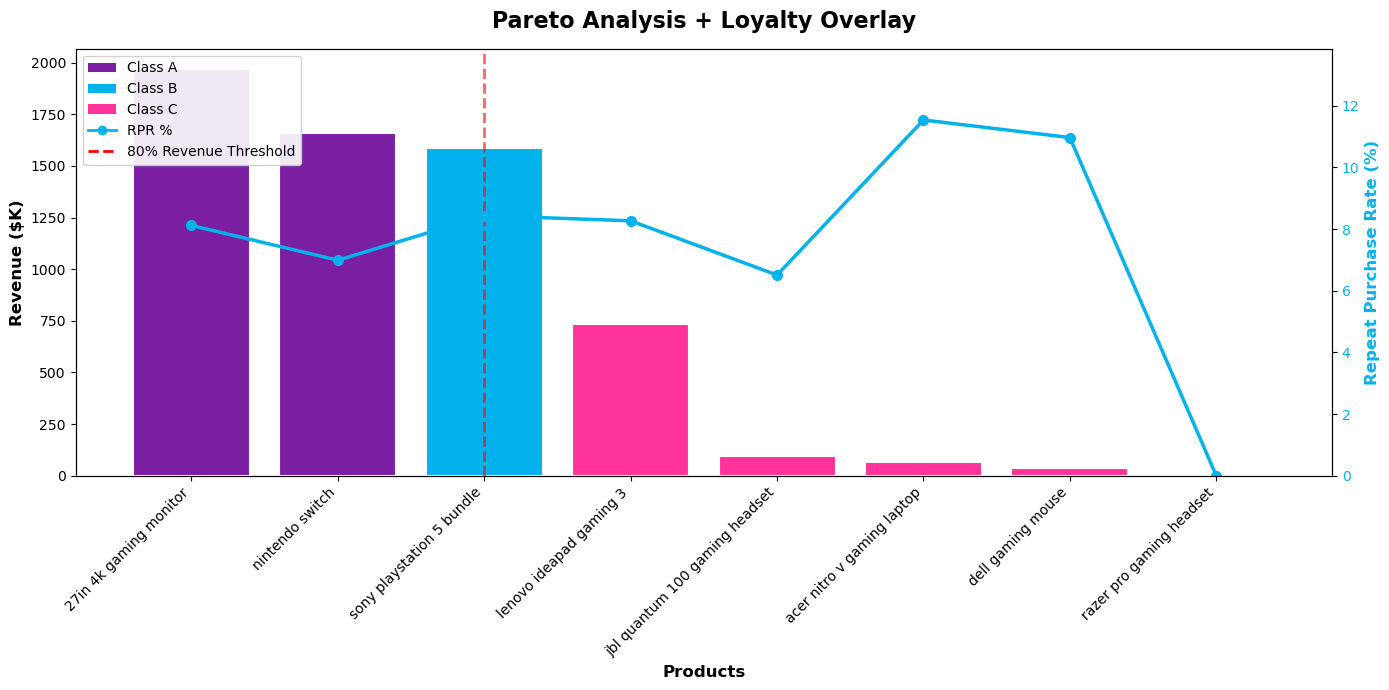

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sort by total revenue
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Custom colors for ABC classes (mapping: A, B, C → your palette)
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]  # A=purple, B=blue, C=pink
abc_color_map = {'A': abc_colors_palette[0], 'B': abc_colors_palette[1], 'C': abc_colors_palette[2]}
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Bar chart: Total Revenue ---
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue']/1000,  # in $K
    color=colors,
    edgecolor='white',
    linewidth=1.5
)
ax1.set_ylabel('Revenue ($K)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Products', fontsize=12, fontweight='bold')
ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)

# --- Line chart: RPR% ---
ax2 = ax1.twinx()
ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color='#03b2ed',  # blue line for RPR
    marker='o',
    linewidth=2.5,
    markersize=7,
    label='RPR %'
)
ax2.set_ylabel('Repeat Purchase Rate (%)', color='#03b2ed', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#03b2ed')
ax2.set_ylim(0, max(sorted_df['rpr_%'].max()*1.2, 10))

# --- Add 80% cumulative revenue threshold as vertical line ---
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(x=threshold_idx, color='red', linestyle='--', linewidth=2, alpha=0.6, label='80% Revenue Threshold')

# --- Legend ---
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color='#03b2ed', marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='80% Revenue Threshold')
]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=10, framealpha=0.9)

# --- Title & Layout ---
plt.title('Pareto Analysis + Loyalty Overlay', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


C:\Users\shaif\AppData\Local\Temp\ipykernel_18312\2889038434.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)


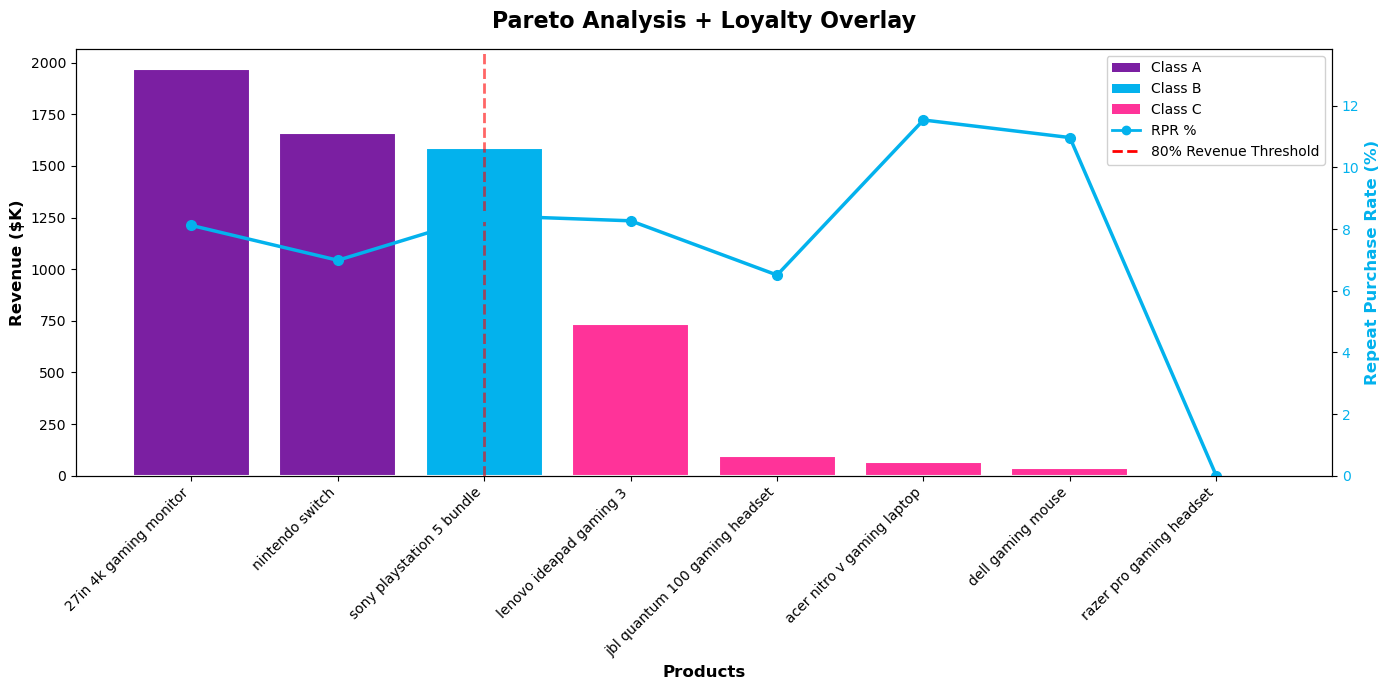

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sort by total revenue
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Custom colors for ABC classes
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]  # A=purple, B=blue, C=pink
abc_color_map = {'A': abc_colors_palette[0], 'B': abc_colors_palette[1], 'C': abc_colors_palette[2]}
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Bar chart: Total Revenue ---
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue']/1000,  # in $K
    color=colors,
    edgecolor='white',
    linewidth=1.5
)
ax1.set_ylabel('Revenue ($K)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Products', fontsize=12, fontweight='bold')
ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)

# --- Line chart: RPR% ---
ax2 = ax1.twinx()
ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color='#03b2ed',  # blue line for RPR
    marker='o',
    linewidth=2.5,
    markersize=7,
    label='RPR %'
)
ax2.set_ylabel('Repeat Purchase Rate (%)', color='#03b2ed', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='#03b2ed')
ax2.set_ylim(0, max(sorted_df['rpr_%'].max()*1.2, 10))

# --- Add 80% cumulative revenue threshold as vertical line ---
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(x=threshold_idx, color='red', linestyle='--', linewidth=2, alpha=0.6, label='80% Revenue Threshold')

# --- Legend (Top Right) ---
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color='#03b2ed', marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='80% Revenue Threshold')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=10, framealpha=0.9)

# --- Title & Layout ---
plt.title('Pareto Analysis + Loyalty Overlay', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


C:\Users\shaif\AppData\Local\Temp\ipykernel_18312\811646063.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)


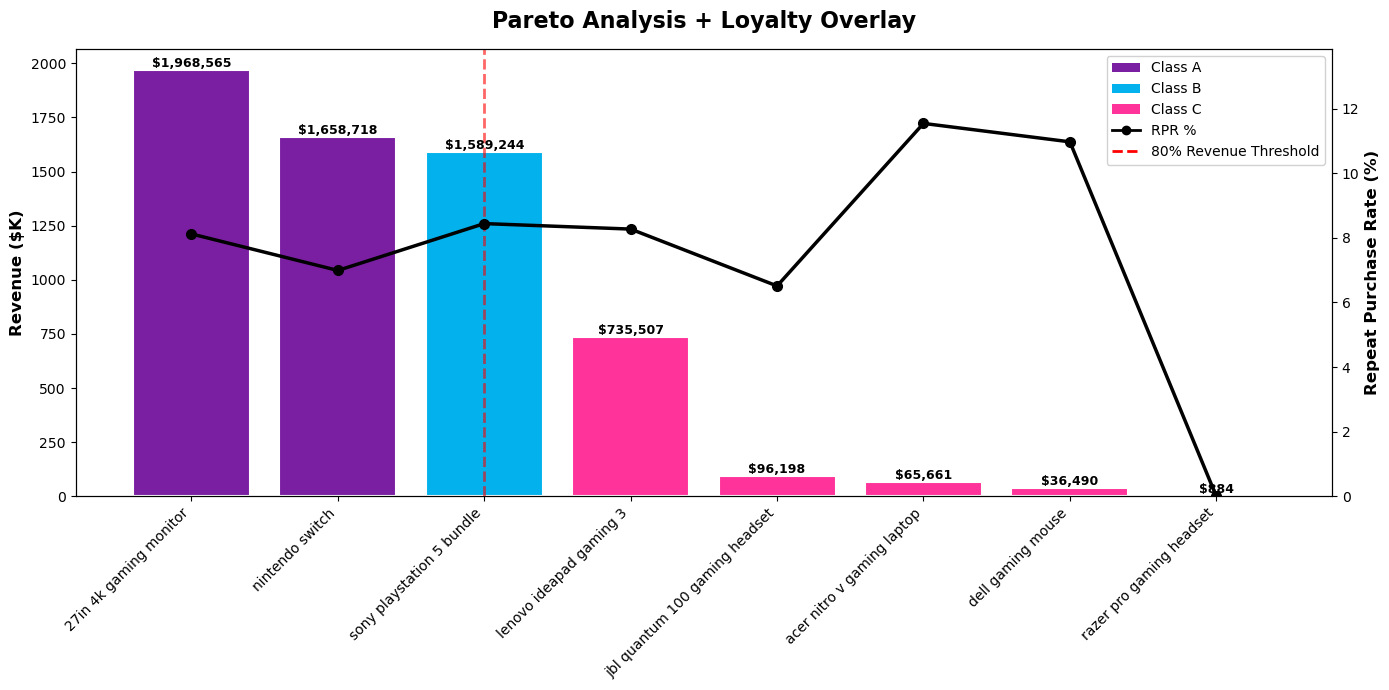

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Sort by total revenue
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Custom colors for ABC classes
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]  # A=purple, B=blue, C=pink
abc_color_map = {'A': abc_colors_palette[0], 'B': abc_colors_palette[1], 'C': abc_colors_palette[2]}
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Bar chart: Total Revenue ---
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue']/1000,  # in $K
    color=colors,
    edgecolor='white',
    linewidth=1.5
)
ax1.set_ylabel('Revenue ($K)', fontsize=12, fontweight='bold')
ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)

# Add revenue labels on top of bars (thousand separator)
for bar, rev in zip(bars, sorted_df['total_revenue']):
    ax1.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"${rev:,.0f}",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold'
    )

# --- Line chart: RPR% ---
ax2 = ax1.twinx()
ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color='black',  # RPR line black
    marker='o',
    linewidth=2.5,
    markersize=7,
    label='RPR %'
)
ax2.set_ylabel('Repeat Purchase Rate (%)', color='black', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(sorted_df['rpr_%'].max()*1.2, 10))

# --- Add 80% cumulative revenue threshold as vertical line ---
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(x=threshold_idx, color='red', linestyle='--', linewidth=2, alpha=0.6, label='80% Revenue Threshold')

# --- Legend (Top Right) ---
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color='black', marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='80% Revenue Threshold')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=10, framealpha=0.9)

# --- Title & Layout ---
plt.title('Pareto Analysis + Loyalty Overlay', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()


C:\Users\shaif\AppData\Local\Temp\ipykernel_18312\1937813913.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)


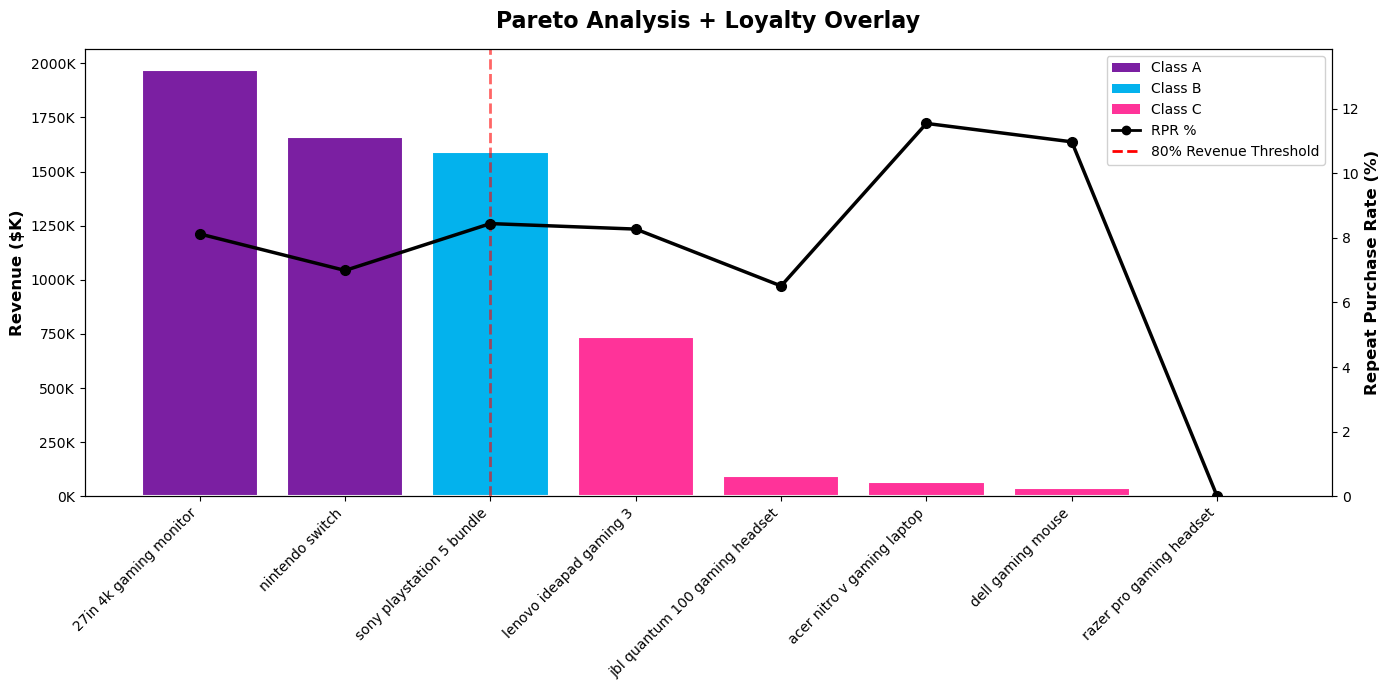

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

# Sort by total revenue
sorted_df = df.sort_values('total_revenue', ascending=False).reset_index(drop=True)

# Custom colors for ABC classes
abc_colors_palette = ["#7B1FA2", "#03b2ed", "#FF3399"]  # A=purple, B=blue, C=pink
abc_color_map = {'A': abc_colors_palette[0], 'B': abc_colors_palette[1], 'C': abc_colors_palette[2]}
colors = [abc_color_map[c] for c in sorted_df['abc_class']]

# Create figure
fig, ax1 = plt.subplots(figsize=(14, 7))

# --- Bar chart: Total Revenue ---
bars = ax1.bar(
    sorted_df['product_name_cleaned'],
    sorted_df['total_revenue']/1000,  # in $K
    color=colors,
    edgecolor='white',
    linewidth=1.5
)
ax1.set_ylabel('Revenue ($K)', fontsize=12, fontweight='bold')
ax1.set_xticklabels(sorted_df['product_name_cleaned'], rotation=45, ha='right', fontsize=10)

# Format y-axis as 1K, 2K etc.
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}K'))

# --- Line chart: RPR% ---
ax2 = ax1.twinx()
ax2.plot(
    sorted_df['product_name_cleaned'],
    sorted_df['rpr_%'],
    color='black',  # RPR line black
    marker='o',
    linewidth=2.5,
    markersize=7,
    label='RPR %'
)
ax2.set_ylabel('Repeat Purchase Rate (%)', color='black', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim(0, max(sorted_df['rpr_%'].max()*1.2, 10))

# --- Add 80% cumulative revenue threshold as vertical line ---
threshold_idx = np.argmax(sorted_df['cumulative_revenue_%'] >= 80)
ax1.axvline(x=threshold_idx, color='red', linestyle='--', linewidth=2, alpha=0.6, label='80% Revenue Threshold')

# --- Legend (Top Right) ---
legend_elements = [
    Patch(facecolor=abc_colors_palette[0], label='Class A'),
    Patch(facecolor=abc_colors_palette[1], label='Class B'),
    Patch(facecolor=abc_colors_palette[2], label='Class C'),
    plt.Line2D([0], [0], color='black', marker='o', linewidth=2, label='RPR %'),
    plt.Line2D([0], [0], color='red', linestyle='--', linewidth=2, label='80% Revenue Threshold')
]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=10, framealpha=0.9)

# --- Title & Layout ---
plt.title('Pareto Analysis + Loyalty Overlay', fontsize=16, fontweight='bold', pad=15)
plt.tight_layout()
plt.show()
